# INFO 3950 Problem Set 5

name: Kate Li

netid: kl739

In [3]:
#standard imports here, any number of cells
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

##  1) knn digit data
In the [digits_classification_exercise](http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html) discussed in class (see [lec12_digits.ipynb](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2025sp/lec12_digits.ipynb)), [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) was used to classify 8x8 images of handwritten digits. This is the same dataset as used in [ps4](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2025sp/ps4.ipynb) problem 1.

In [5]:
from sklearn import datasets, neighbors, linear_model

In [6]:
# load data
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [7]:
# split into train and test 90/10
n_samples = len(X_digits)
f = int(0.9 * n_samples)

X_train = X_digits[:f] #first 90%
y_train = y_digits[:f]

X_test = X_digits[f:]  #last 10%
y_test = y_digits[f:]

### **A.** k=1

**Train a [KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) with k=1 on the same training set, and determine its accuracy on the test set.**

(You should find that it does better than the 169/180 score of the logistic classifier.)

Visualize the ones it gets wrong together with the single nearest neighbor (as given by `.kneighbors()`) that caused it to be misclassified.<br>
(This is perhaps easiest in a grid with two rows, showing the ones misclassified in the first row, with their test indices above, and the nearest neighbors directly below, with their training indices; and with the correct labels in the upper right of all. It might look something like the below [if there were 5 wrong], though the first row is not actually the ones that were wrong and the 2nd row is not actually their nearest neighbors.)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
incorrect = np.where(y_test != y_pred)[0]

print(f"accuracy: {accuracy:.6f}")

accuracy: 0.966667


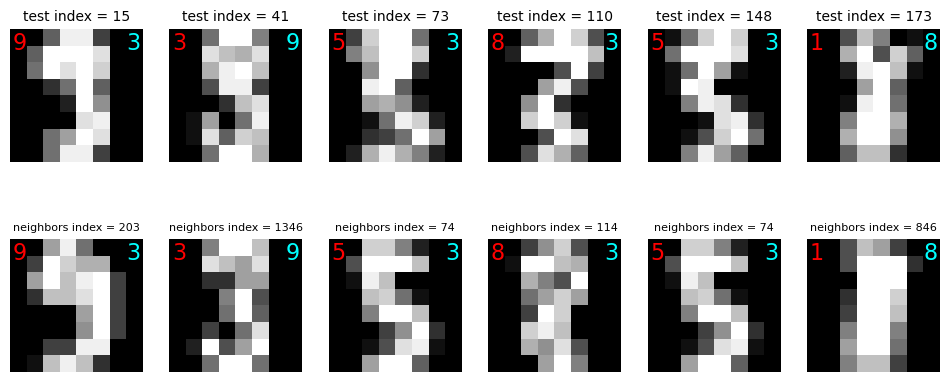

In [11]:
plt.figure(figsize = (12, 5))
i = 0
for index in incorrect:
    copy = X_test[index].copy()
    n_indices = knn.kneighbors([copy], n_neighbors = 1)[1][0]
    neighbor = X_train[n_indices[0]]

    plt.subplot(2, len(incorrect), i+1)
    plt.imshow(copy.reshape(8, 8), cmap = 'grey')
    plt.title(f"test index = {index}", fontsize = 10)
    plt.text(0.02, 0.98, f"{y_pred[index]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')
    plt.text(0.98, 0.98, f"{y_test[index]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='right', color='cyan')
    plt.axis('off')

    plt.subplot(2, len(incorrect), len(incorrect) + i + 1)
    plt.imshow(neighbor.reshape(8, 8), cmap = 'grey')
    plt.title(f"neighbors index = {n_indices[0]}", fontsize = 8)
    plt.text(0.02, 0.98, f"{y_pred[index]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='left', color='red')
    plt.text(0.98, 0.98, f"{y_test[index]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='right', color='cyan')
    plt.axis('off')

    i += 1

### **B.** k=3,7

With same training and test set as above,

**i) Train a `KNeighborsClassifier()` with k=3. How many does it get wrong on the training and test sets?**

In [13]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(X_train, y_train)
y_train_pred3 = knn_3.predict(X_train)
y_test_pred3 = knn_3.predict(X_test)

train_wrong3 = len(np.where(y_train_pred3 != y_train)[0])
test_wrong3 = len(np.where(y_test_pred3 != y_test)[0])

print(f"# wrong for train set: {train_wrong3}")
print(f"# wrong for test set: {test_wrong3}")

# wrong for train set: 11
# wrong for test set: 6


**ii) Train a `KNeighborsClassifier()` with k=7. How many does it get wrong on the training and test sets?**

In [15]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit(X_train, y_train)
y_train_pred7 = knn_7.predict(X_train)
y_test_pred7 = knn_7.predict(X_test)

train_wrong7 = len(np.where(y_train_pred7 != y_train)[0])
test_wrong7 = len(np.where(y_test_pred7 != y_test)[0])

print(f"# wrong for train set: {train_wrong7}")
print(f"# wrong for test set: {test_wrong7}")

# wrong for train set: 16
# wrong for test set: 7


**iii) For any that are correct in the test set for k=3, but wrong for k=7. Show the image itself with its seven nearest neighbors (as given by `.kneighbors()` from the classifier in part ii) to the right (showing their actual labels in the upper right of each).**

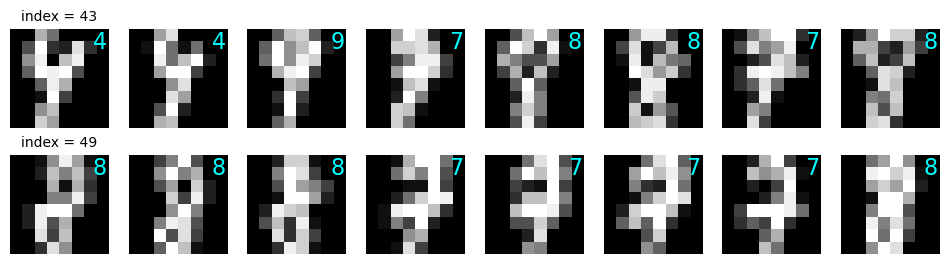

In [17]:
condition1 = np.where((y_test_pred3 == y_test) & (y_test_pred7 != y_test))[0]

plt.figure(figsize = (12, 3))
i = 0
for index in condition1:
    copy = X_test[index].copy()
    n_indices = knn_7.kneighbors([copy], n_neighbors = 7)[1][0]
    neighbor = X_train[n_indices]
    neighbor_labels = y_train[n_indices]

    plt.subplot(len(condition1), 8, i*8+1)
    plt.imshow(copy.reshape(8, 8), cmap = 'grey')
    plt.title(f"index = {index}", fontsize = 10)
    plt.text(0.98, 0.98, f"{y_test[index]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='right', color='cyan')
    plt.axis('off')

    for j in range(7):
        plt.subplot(len(condition1), 8, i*8 + j + 2)
        plt.imshow(neighbor[j].reshape(8, 8), cmap = 'grey')
        plt.text(0.98, 0.98, f"{neighbor_labels[j]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='right', color='cyan')
        plt.axis('off')

    i += 1

**iv) For any that are correct in the test set for k=7, but wrong for k=3. Show the image itself with its seven nearest neighbors (as given by `.kneighbors()` from the classifier in part ii) to the right (showing their actual labels in the upper right of each).**

2


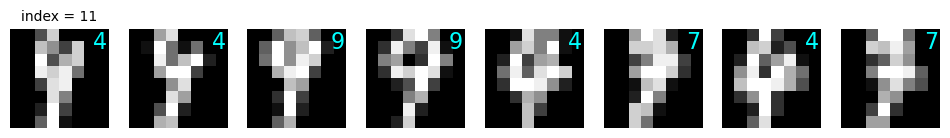

In [19]:
condition2 = np.where((y_test_pred3 != y_test) & (y_test_pred7 == y_test))[0]
print(len(condition1))

plt.figure(figsize = (12, 2))
i = 0
for index in condition2:
    copy = X_test[index].copy()
    n_indices = knn_7.kneighbors([copy], n_neighbors = 7)[1][0]
    neighbor = X_train[n_indices]
    neighbor_labels = y_train[n_indices]

    plt.subplot(len(condition2), 8, i*8+1)
    plt.imshow(copy.reshape(8, 8), cmap = 'grey')
    plt.title(f"index = {index}", fontsize = 10)
    plt.text(0.98, 0.98, f"{y_test[index]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='right', color='cyan')
    plt.axis('off')

    for j in range(7):
        plt.subplot(len(condition2), 8, i*8 + j + 2)
        plt.imshow(neighbor[j].reshape(8, 8), cmap = 'grey')
        plt.text(0.98, 0.98, f"{neighbor_labels[j]}", transform=plt.gca().transAxes,
             fontsize=16, verticalalignment='top', horizontalalignment='right', color='cyan')
        plt.axis('off')

    i += 1

### **C.** test3

Consider the `test3` images (labels 11, 43, 113) from problem 1.B of [ps4](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2025sp/ps4.ipynb).

**i) How many of those does the k=3 classifier get right?**

In [21]:
test3 = [11, 43, 113]
count = 0 
for index in test3:
    test = X_test[index]  # matches test to indices in X_test
    pred = knn_3.predict([test])[0]

    if pred == y_test[index]:
        count += 1

print(f"# that knn_3 classifier gets right: {count}")

# that knn_3 classifier gets right: 2


**ii) Show each of the three alongside its three nearest neighbors (in a 3 row x 4 column grid, including their indices and correct labels as in above plots, as suggested below).** 

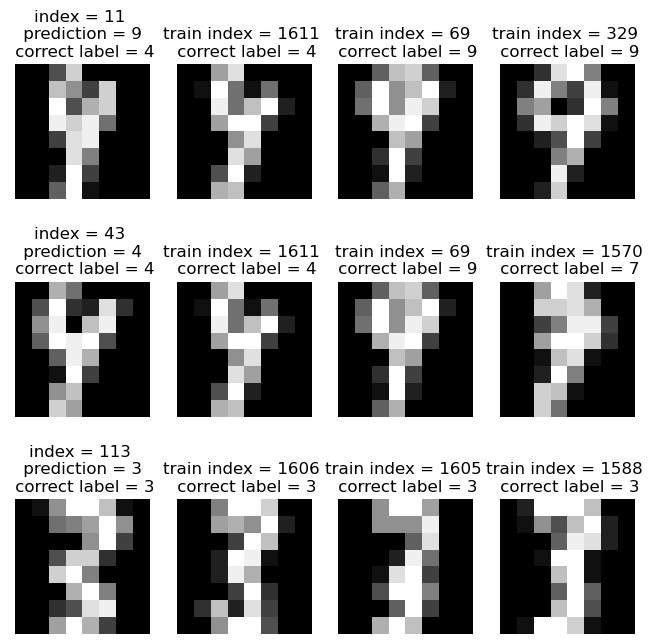

In [23]:
plt.figure(figsize = (8, 8))

i = 0
for index in test3:
    copy = X_test[index].copy()
    n_indices = knn_3.kneighbors([copy], n_neighbors = 3)[1][0]
    neighbor = X_train[n_indices]
    neighbor_labels = y_train[n_indices]

    plt.subplot(3, 4, i*4 + 1)
    plt.imshow(copy.reshape(8, 8), cmap = 'grey')
    plt.title(f"index = {index} \n prediction = {y_test_pred3[index]} \n correct label = {y_test[index]}")
    plt.axis('off')
   
    j = 0
    for idx in n_indices:
        n_image = X_train[idx]
        n_true = y_train[idx]

        plt.subplot(3, 4, i*4 + j + 2)
        plt.imshow(n_image.reshape(8, 8), cmap = 'grey')
        plt.title(f"train index = {idx} \n correct label = {n_true}")
        plt.axis('off')

        j += 1

    i += 1

**iii) What are the probabilistic predictions for these three (from `.predict_proba()`)?**

In [25]:
proba_pred = []
for index in test3:
    prob = knn_3.predict_proba([X_test[index]])[0]
    proba_pred.append(prob)

for index, prob in zip(test3, proba_pred):
    print(f"probabilistic prediction for index {index} = {prob}")

probabilistic prediction for index 11 = [0.         0.         0.         0.         0.33333333 0.
 0.         0.         0.         0.66666667]
probabilistic prediction for index 43 = [0.         0.         0.         0.         0.33333333 0.
 0.         0.33333333 0.         0.33333333]
probabilistic prediction for index 113 = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### **D.** heterogeneous neighborhood

Using your k=7 trained classifier, determine the indices (in the training set) of the 7 nearest neighbors to `X_test[43]`, using the `.kneighbors()` method. There should be multiple different labels (given by `y_train`) in the near vicinity, suggesting this image might be in some sort of transition region.

In [27]:
neighbors = knn_7.kneighbors([X_test[43]], n_neighbors = 7)
distances = neighbors[0]
indices = neighbors[1] # indices of the 7 nn of X_test[43]

print(f"actual y_train labels: {y_train[indices][0]}")

actual y_train labels: [4 9 7 8 8 7 8]


**(i) Plot the above test image, alongside the seven nearest neighbor training images, with their indices and labels indicated in the plot.**

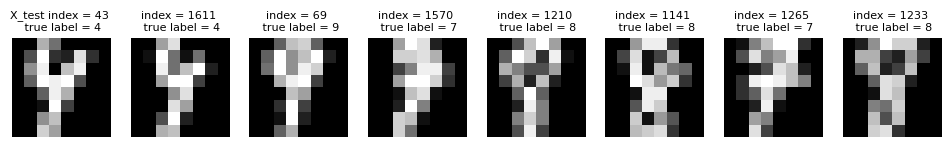

In [29]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 8, 1)
plt.imshow(X_test[43].reshape(8, 8), cmap = 'grey')
plt.title(f"X_test index = 43 \n true label = {y_test[43]}", fontsize = 8)
plt.axis('off')

i = 0
for index in indices[0]:
    plt.subplot(1, 8, i + 2)
    plt.imshow(X_train[index].reshape(8, 8), cmap = 'grey')
    true_label = y_train[index]
    plt.title(f"index = {index} \n true label = {true_label}", fontsize = 8) 
    plt.axis('off')

    i += 1

**(ii) Now expand the set to include the nearest neighbors of those seven training images. In principle that could be 49 total, but some of them occur as neighbors of some of the others, so there will be fewer. (I found 35 distinct indices.) These training images are points in a 64 dimensional space, but we can visualize their relative positions by using PCA to dimensionally reduce to d=2, as in [lec18_pca.ipynb](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2025sp/lec18_pca.ipynb), to get a feeling for the region in which `X_test[43]` resides. Your plot of the 1+35 points should color the points according to their labels, with a legend indicating which digit (i.e., the y_train values) corresponds to which color (I found 5 colors). Use a different symbol for the test point.**

In [31]:
from sklearn.decomposition import PCA

In [32]:
indices_lvl1 = indices[0]

neighbors_lvl2 = set(indices_lvl1)
for i in indices_lvl1:
    __, neighbors = knn_7.kneighbors([X_train[i]], n_neighbors = 7)
    neighbors_lvl2.update(neighbors[0])

all_nn = sorted(neighbors_lvl2)

print(f"number of distinct indices = {len(all_nn)}")

X_pca_input = np.vstack([X_test[43], X_train[all_nn]]) # test image and 35 neighbor images
y_pca_labels = np.hstack([y_test[43], y_train[all_nn]]) # labels

pca = PCA(n_components = 2).fit_transform(X_pca_input)

number of distinct indices = 35


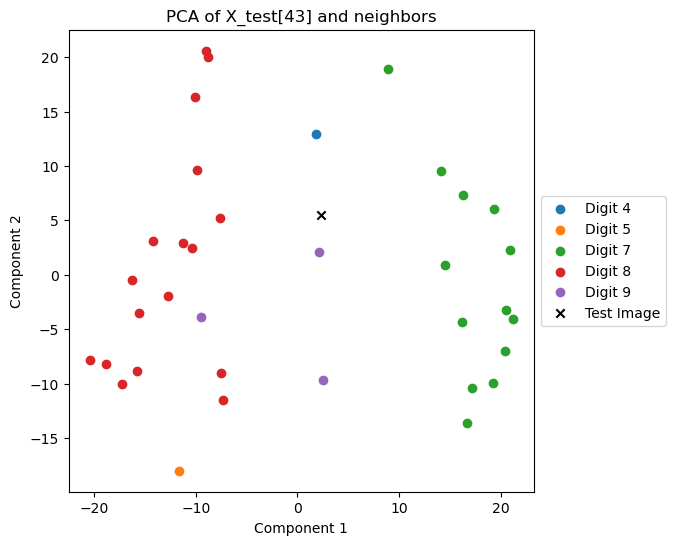

In [33]:
plt.figure(figsize = (6, 6))

# neighbors
for x in np.unique(y_pca_labels[1:]):
    idx = np.where(y_pca_labels[1:] == x)[0] + 1
    plt.scatter(pca[idx, 0], pca[idx, 1], marker = 'o', label = f"Digit {x}")

plt.scatter(pca[0, 0], pca[0, 1], c = 'black', marker = 'x', label = 'Test Image')
plt.title('PCA of X_test[43] and neighbors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

**(iii) For the nearest neighbor to `X_test[43]`, determine the distance from the output of the `.kneighbors()` method. Then use the formula given in class, taking the pixel by pixel differences, squaring them and summing (this is easy using numpy arrays), and finally taking the square root, to confirm this is the formula used by the  `KNeighborsClassifier()` module.**

In [35]:
nn_distance = distances[0][0]
print(f"distance from the output of the nearest neighbor = {nn_distance}")

distance from the output of the nearest neighbor = 22.715633383201094


In [36]:
nn_index = indices[0][0]
pixel_diff = X_test[43] - X_train[nn_index] # x - y
diff_sq = pixel_diff ** 2
sum_diff_sq = np.sum(diff_sq)

formula_dist = np.sqrt(sum_diff_sq)
print(f"distance calculated from formula = {formula_dist}")

#print(nn_distance == formula_dist)

distance calculated from formula = 22.715633383201094


## 2) kmeans face data

In [lec16_knn-interactive.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2025sp/lec16_knn-interactive.ipynb), one of the interactive demos used this data:
[faces.npy](https://courses.cit.cornell.edu/info3950_2025sp/faces.npy), a set of 400 38x31 face images (280 train, 120 test) loadable as

    X_train, y_train, X_test, y_test, xdim, ydim = np.load('faces.npy', allow_pickle=True)

More details about this data are given in the notebook.

In this problem we'll suppose that we were given these images without labels, knowing only that there were 40 distinct subjects, but not knowing how many or which images correspond to each. Following [Example 1](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-1:-k-means-on-digits) from VanderPlas [05.11-k-means](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), we can use kmeans on the training set to find natural clusters. For this problem you should initialize as

    KMeans(n_clusters=40, random_state=832)
    
(Since [Kmeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) has a random initialization to find the clusters, `random_state=832` will ensure everyone has similar results.)

[lec17_kmeans.ipynb](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info3950_2025sp/lec17_kmeans.ipynb)
(Lec17) covered enough to make this problem feasible, along with VanderPlas [05.11-k-means](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).

In [38]:
from sklearn.cluster import KMeans 

In [39]:
X_train, y_train, X_test, y_test, xdim, ydim = np.load('faces.npy', allow_pickle=True)
model = KMeans(n_clusters = 40, random_state = 3620)
# I used a random state of 3620 instead of 832 because of the post on ed discussion

### A. Cluster centers

Fit your `KMeans()` on the 280 training set examples. It has methods `.cluster_centers_` and `labels_` that will provide the 40 cluster centers it finds, and the cluster label it assigns to the 280 training samples.

**Render all 40 cluster centers in a 5 row, 8 column grid (use `figsize=(20, 15)`) to see what the look like. Recall you'll have to use `.reshape(38, 31)` on the data so that it can be interpreted as an image for `plt.imshow()`.**

Shown below is one example (the subject labeled '8' in the train/test data). This subject is distinct enough to have had her seven training images assigned to the same cluster, with the average of those seven images (pixel by pixel) shown at the top. The last three images are from the test set, also correctly assigned to this cluster (and no other training or test images were assigned to it).  [Your plot should show only the 40 cluster centers (i.e., the means as in the topmost image) -- you don't need to show the training or test images as below.]

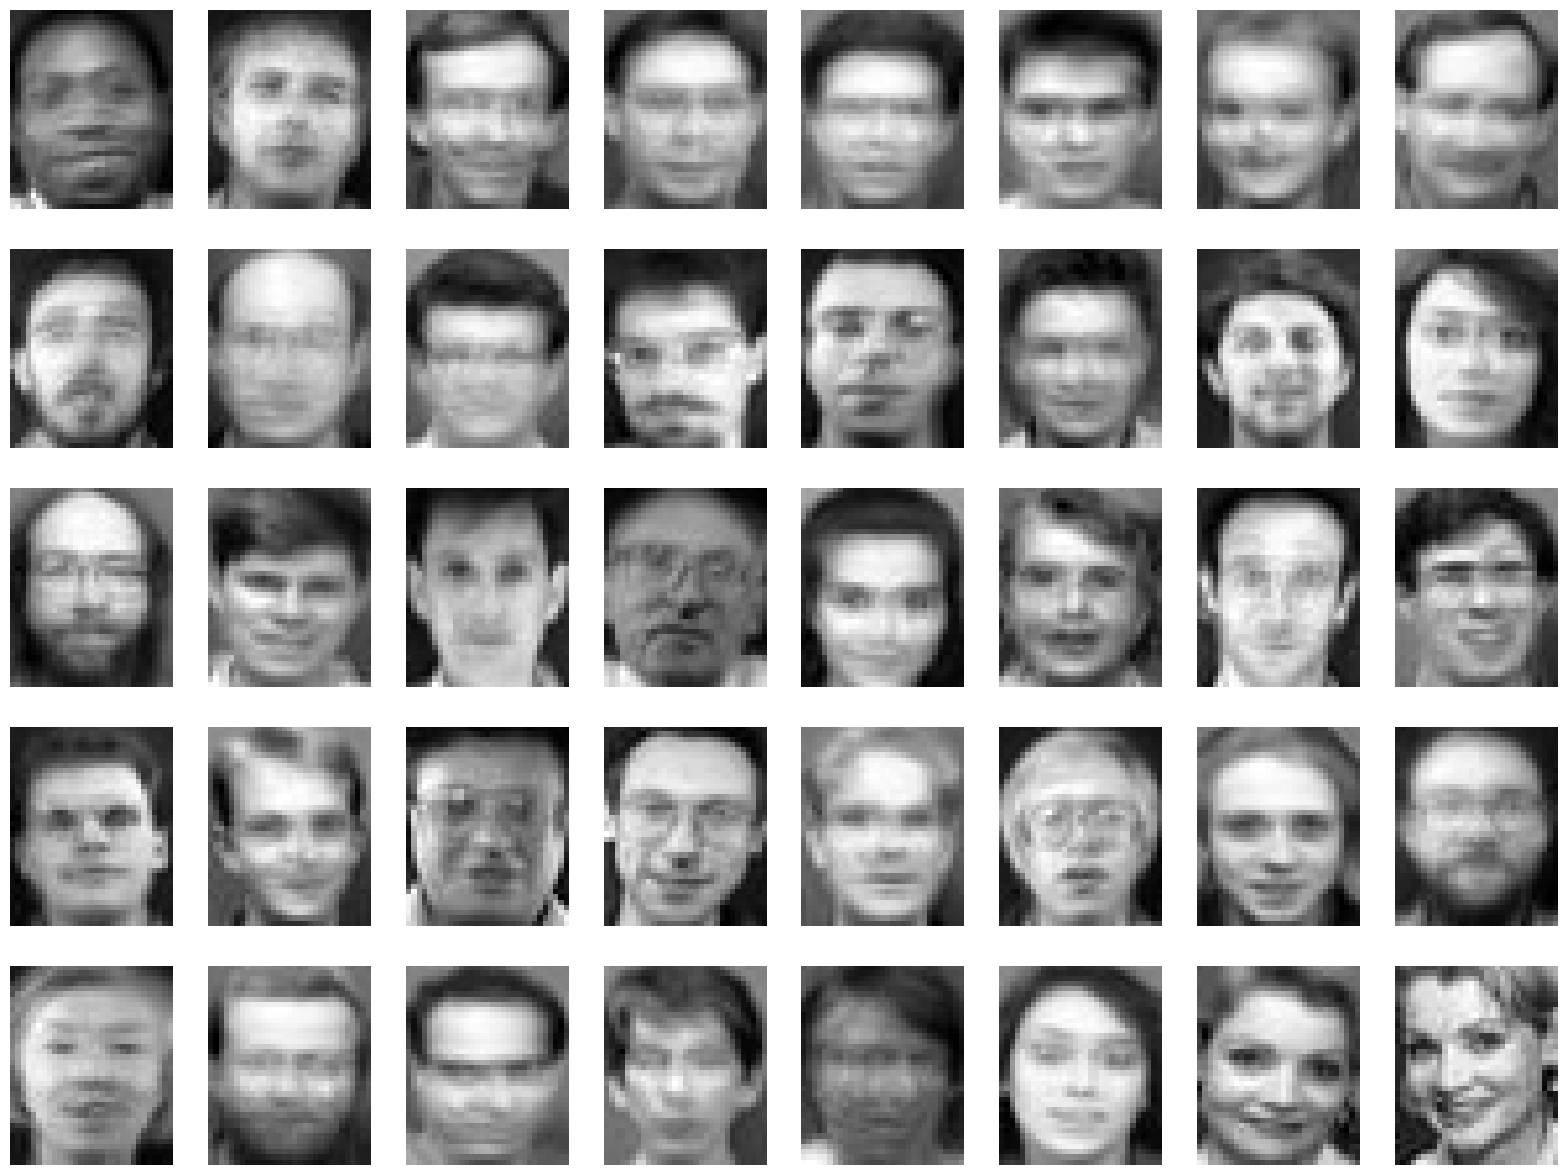

In [41]:
model.fit(X_train)
centers = model.cluster_centers_

plt.figure(figsize = (20, 15))
for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.imshow(centers[i].reshape(38, 31), cmap = 'grey')
    plt.axis('off')

### B. Score

As in [5.11 Example 1](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#Example-1:-k-means-on-digits), the `KMeans()` algorithm will 
return cluster labels from 0-39 that are some permutation of the original labels (which it does not know -- **Note also:** the original labels in the y_train and y_test data are given as 1-40).

**The cluster labels can be mapped to the original labels using the original label that occurs most frequently in each cluster (the 'mode' as in above-linked notebook). Using this assignment, what is the percentage of the training images labelled correctly?<br>
(You should get over 80%, which is quite high given that random guessing would give 1/40 = 2.5%.)**

In [43]:
from scipy.stats import mode

In [44]:
cluster_labels = model.labels_
labels = np.zeros_like(cluster_labels)

for L in range(40):
    match = (cluster_labels == L)
    labels[match] = mode(y_train[match])[0]

num_correct = (labels == y_train)
percentage = num_correct.mean() * 100
print(f"percentage of training images labelled correctly = {percentage:.6f}%")

percentage of training images labelled correctly = 82.857143%


### C. Confusion matrix

Plot the confusion matrix for the training set results above. (For this you can use scikit-learn's `confusion_matrix()` and `ConfusionMatrixDisplay()`. Recall that the original labels run from 1-40, not 0-39).

**Which are the two most conflated subjects (i.e., the largest off-diagonal element)?**

**Show the training set images for those two subjects in a 2 row x 7 column grid (using `figsize=(12,4)`).<br>
[It will look something like the below for subjects labelled 8 and 10, though these are not the two most confused subjects -- in fact these two are not confused at all by the kMeans classifier.]**

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

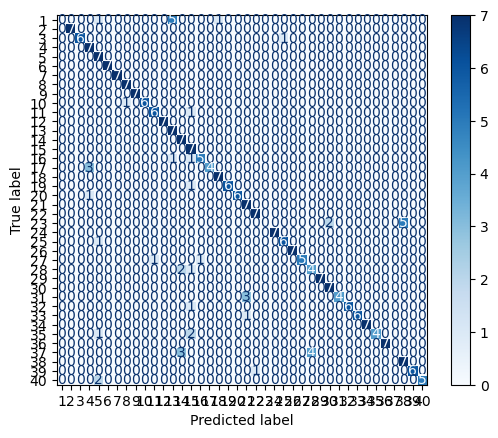

In [47]:
cm = confusion_matrix(y_train, labels)
fig = ConfusionMatrixDisplay(cm, display_labels = range(1, 41))
fig.plot(cmap = 'Blues')

In [48]:
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)
most_confused = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)
true, predicted = most_confused
true += 1
predicted += 1

print(f"the most confused images are the ones at these indices: \n {true} (true image) and {predicted} (predicted image)")

the most confused images are the ones at these indices: 
 1 (true image) and 13 (predicted image)


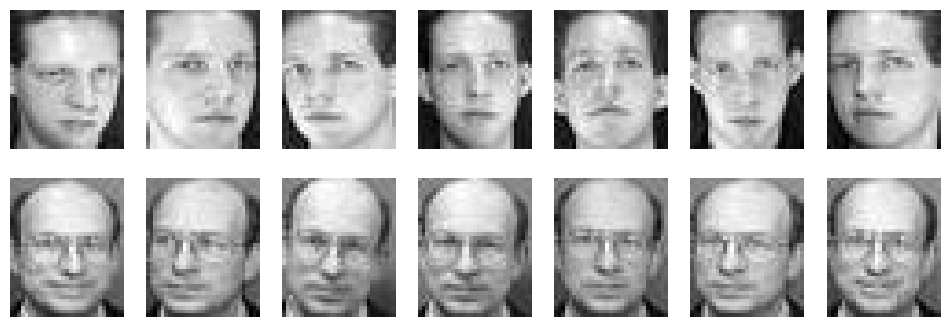

In [49]:
true_image = X_train[y_train == true]
pred_image = X_train[y_train == predicted]

plt.figure(figsize = (12, 4))
for i in range(7):
    plt.subplot(2, 7, i + 1)
    plt.imshow(true_image[i].reshape(38, 31), cmap = 'grey')
    plt.axis('off')

    plt.subplot(2, 7, i + 8)
    plt.imshow(pred_image[i].reshape(38, 31), cmap = 'grey')
    plt.axis('off')

### D. test set

**Now run your `.predict()` method on the 120 test images, and determine the overall percentage assigned to the correct clusters.<br>
(You should get over 70%, but if 80% or above you've done it incorrectly. The most common error is to redetermine map_label from the test set, but that's not how the train/test methodology works. It was important to continue using the mapping of clusters as determined by the training set, and then to see how well the kmeans cluster assignments *together with that mapping* performed on the test set.)**

In [51]:
pred_labels = model.predict(X_test)
labels = np.zeros_like(pred_labels)

for L in range(40):
    match = (pred_labels == L)
    labels[match] = mode(y_train[cluster_labels == L])[0]

num_correct = (labels == y_test)
percentage = num_correct.mean() * 100
print(f"percentage of testing images labelled correctly = {percentage}%")

percentage of testing images labelled correctly = 77.5%


### E. heterogeneous neighborhood

Similar to 1D above, investigate the local neighborhood of the image `Xtest_[38]`. For this, train a k=9 classifer on `X_train` to determine the indices (in the training set) of its 9 nearest neighbors, using the `.kneighbors()` method. There should again be multiple different labels  (given by `y_train`) in the near vicinity, suggesting this image might be in some sort of transition region.

In [53]:
knn_9 = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
neighbors_9 = knn_9.kneighbors([X_test[38]], n_neighbors = 9)
distances = neighbors_9[0]
indices = neighbors_9[1]

print(f"actual y_train labels: {y_train[indices][0]}")

actual y_train labels: [ 3 17  9 30 25 36  3 17 38]


**(i) Plot the above test image, alongside the nine nearest neighbor training images (in two rows of 5), with their indices and labels indicated in the plot.**

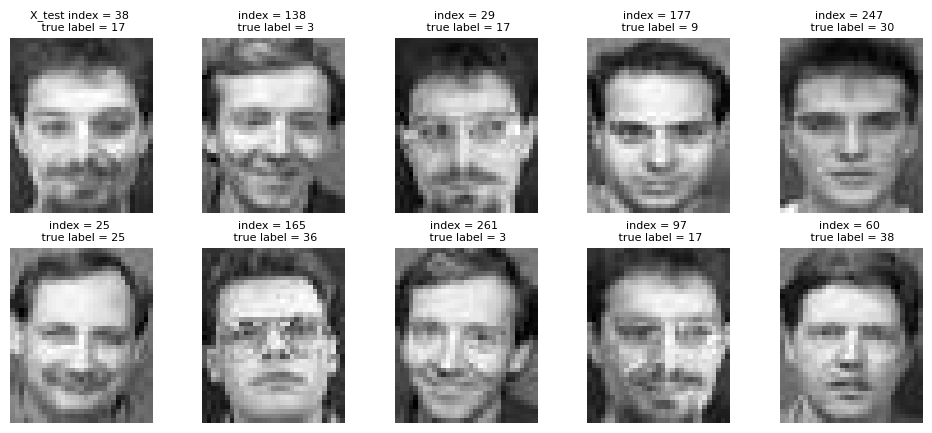

In [55]:
plt.figure(figsize = (12, 5))

plt.subplot(2, 5, 1)
plt.imshow(X_test[38].reshape(38, 31), cmap = 'grey')
plt.title(f"X_test index = 38 \n true label = {y_test[38]}", fontsize = 8)
plt.axis('off')

for i, index in enumerate(indices[0]):
    plt.subplot(2, 5, i + 2)
    plt.imshow(X_train[index].reshape(38, 31), cmap = 'grey')
    true_label = y_train[index]
    plt.title(f"index = {index} \n true label = {true_label}", fontsize = 8)
    plt.axis('off')

**(ii) Now expand the set to include the nearest neighbors of those nine training images. In principle that could be 81 total, but some of them occur as neighbors of some of the others, so there will be fewer. (I found 54 distinct indices.) These training images are points in a `38*31 = 1178` dimensional space, but we can visualize their relative positions by using PCA to dimensionally reduce to d=2, as in 1D above and [lec18_pca.ipynb](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2025sp/lec18_pca.ipynb), to get a feeling for the region in which `X_test[38]` resides. Your plot of the 1+54 points should color the points according to their labels, with a legend indicating which digit (i.e., the y_train values) corresponds to which color. (note there will be more than 10 colors). Use a different symbol for the test point.**

In [57]:
indices_lvl1 = indices[0]

neighbors_lvl2 = set(indices_lvl1)
for i in indices_lvl1:
    _, neighbors = knn_9.kneighbors([X_train[i]], n_neighbors = 9)
    neighbors_lvl2.update(neighbors[0])

all_nn = sorted(neighbors_lvl2)
print(f"number of distinct indices = {len(all_nn)}")

X_pca_input = np.vstack([X_test[38], X_train[all_nn]]) # test image and 54 neighbor images
y_pca_labels = np.hstack([y_test[38], y_train[all_nn]]) # labels

pca = PCA(n_components = 2).fit_transform(X_pca_input)

number of distinct indices = 54


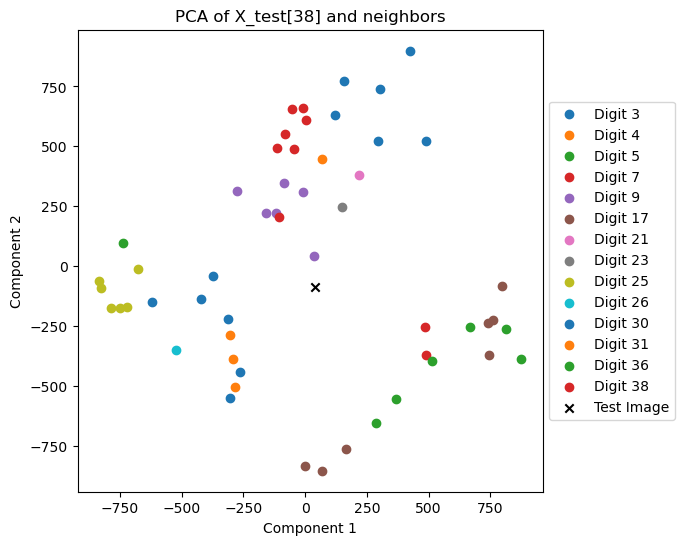

In [58]:
plt.figure(figsize = (6, 6))

# neighbors
for x in np.unique(y_pca_labels[1:]):
    idx = np.where(y_pca_labels[1:] == x)[0] + 1
    plt.scatter(pca[idx, 0], pca[idx, 1], marker = 'o', label = f"Digit {x}")

plt.scatter(pca[0, 0], pca[0, 1], c = 'black', marker = 'x', label = 'Test Image')
plt.title('PCA of X_test[38] and neighbors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()